In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
HUL = pd.read_csv("HINDUSTAN UNILEVER.csv")

In [3]:
HUL.head()
HUL.isnull().sum()
HUL.dropna(inplace=True)


#drop null values

In [4]:
HUL.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
VWAP         0
dtype: int64

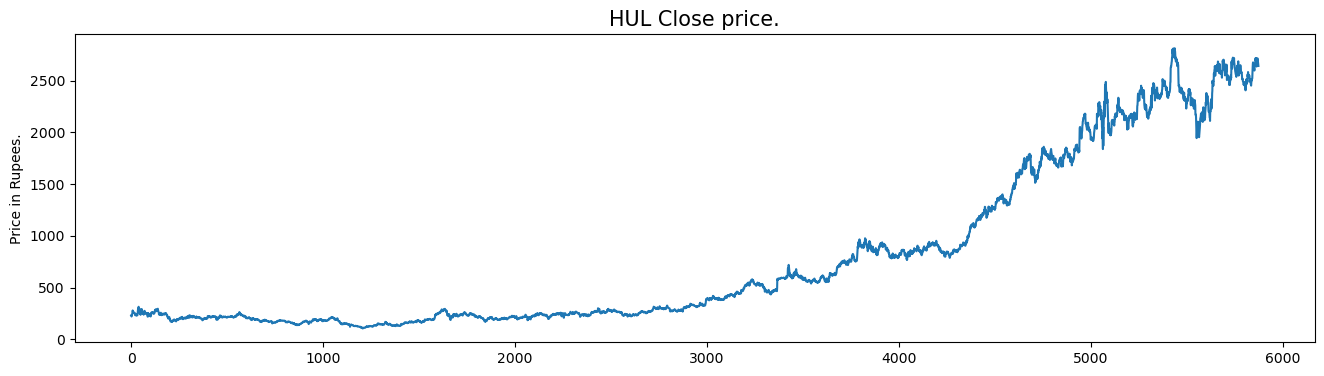

In [5]:
plt.figure(figsize=(16,4)) 
plt.plot(HUL['Close']) 
plt.title('HUL Close price.', fontsize=15) 
plt.ylabel('Price in Rupees.') 
plt.show()

In [6]:
HUL = HUL.drop(['VWAP'], axis=1)

#VWAP column is not that much useful so we can remove this from our dataset

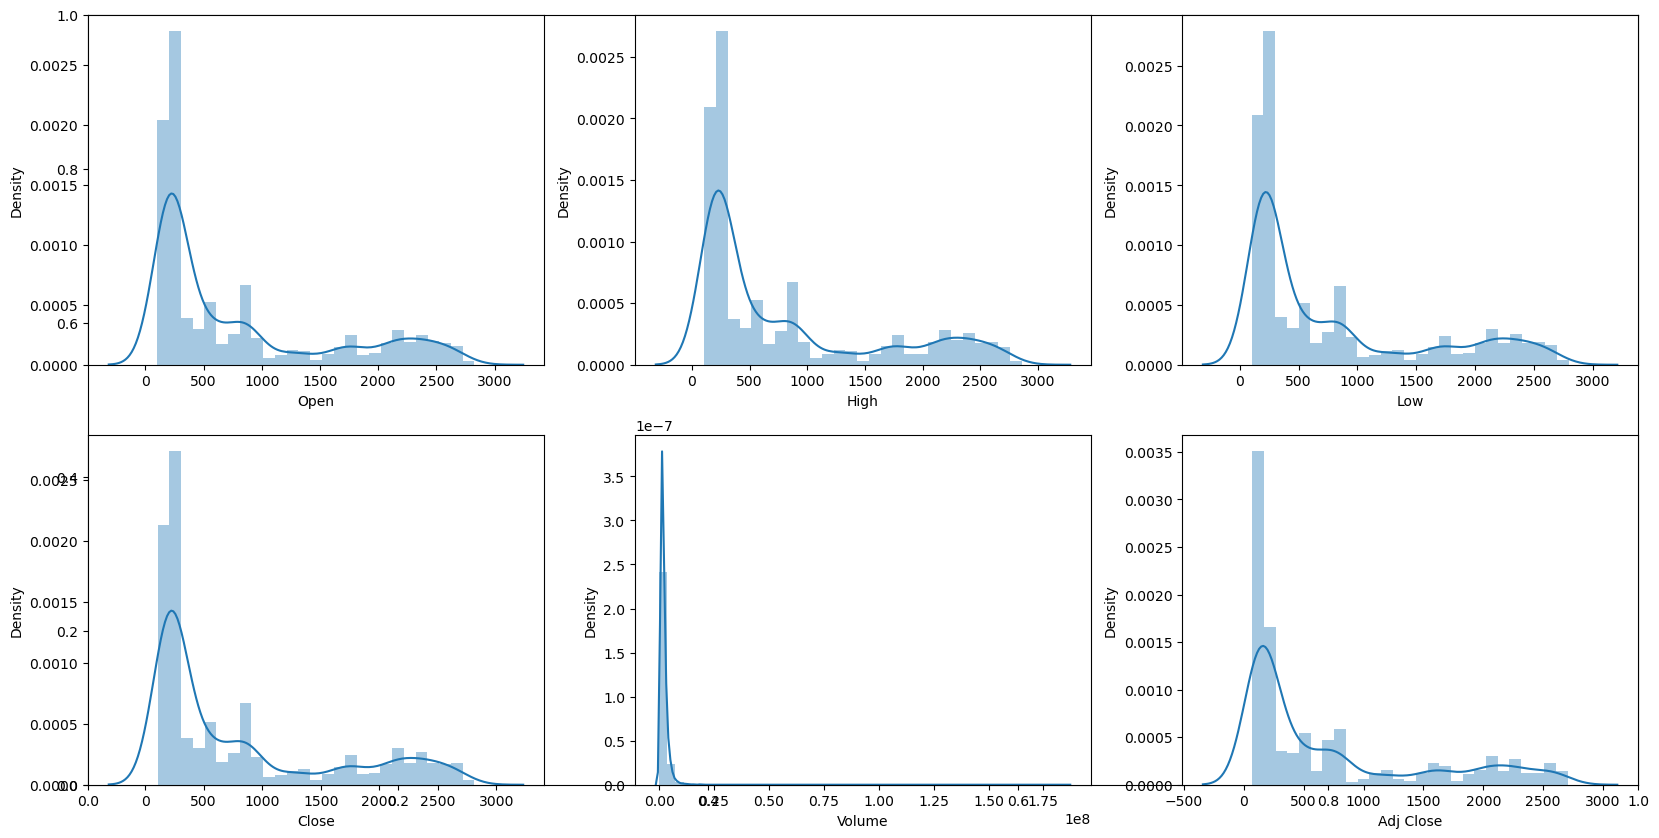

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume','Adj Close'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(HUL[col]) 
plt.show()

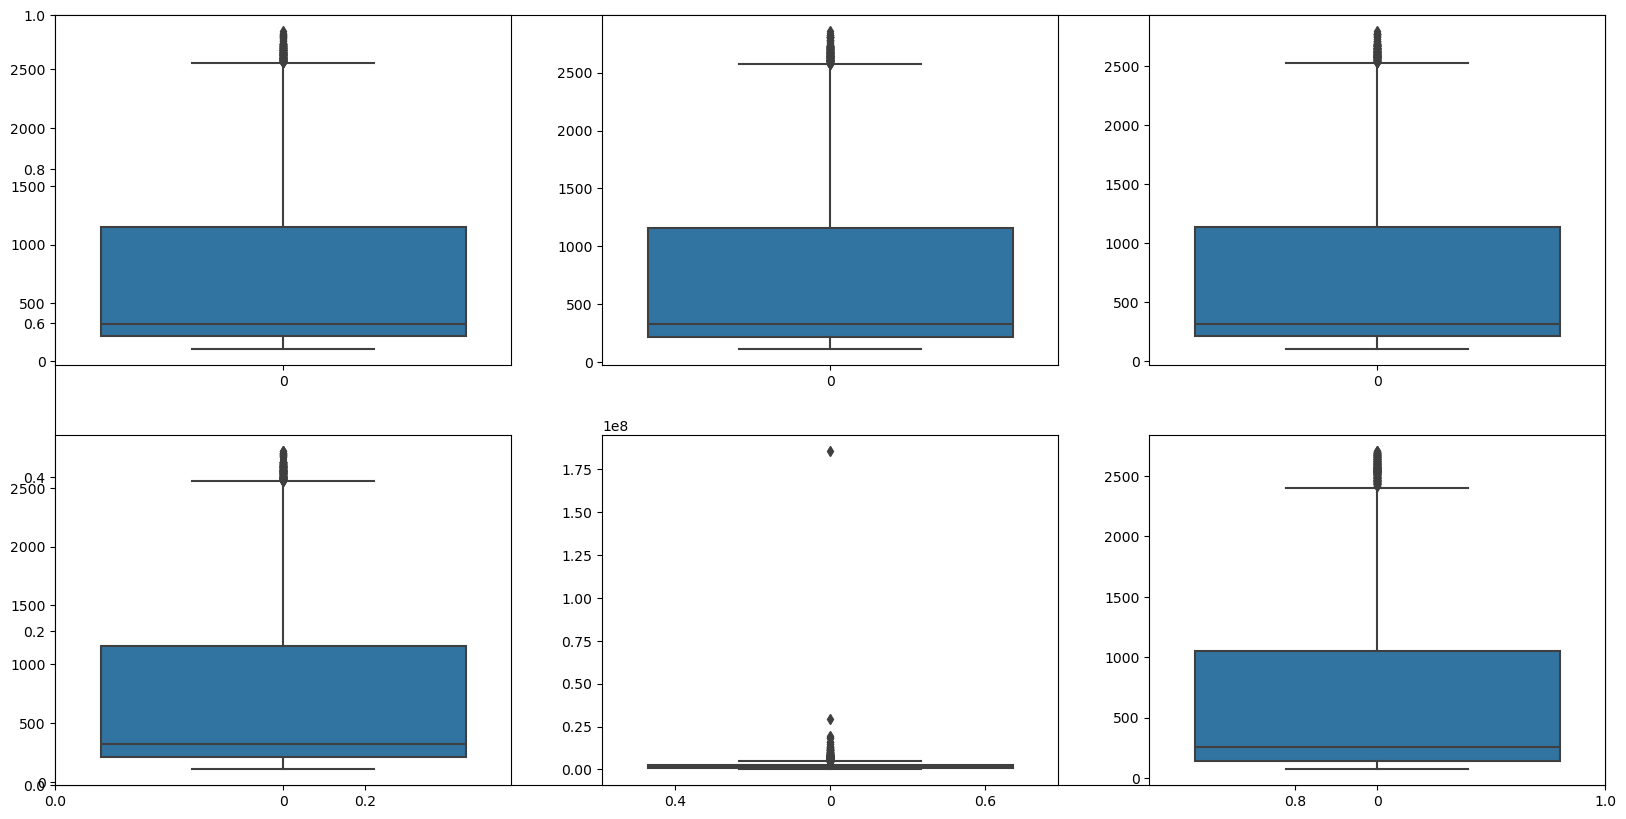

In [8]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(HUL[col]) 
plt.show()

In [9]:
HUL.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5281,03-02-2021,2231.500000,2257.000000,2217.600098,2232.850098,2132.809814,2353429.0
3733,27-10-2014,765.000000,766.049988,715.500000,720.450012,619.602600,2949098.0
3393,07-06-2013,590.549988,592.299988,590.549988,591.150024,493.004303,982944.0
1507,21-10-2005,165.100006,172.199997,165.100006,171.300003,118.234505,2853807.0
2787,29-12-2010,295.700012,305.399994,294.200012,304.700012,243.288879,2300915.0


In [10]:
splitted = HUL['Date'].str.split('-', expand=True)

# Check the structure of the splitted DataFrame
print(splitted.head())

# If the structure looks correct, proceed with assigning the columns
HUL['day'] = splitted[1].astype('int', errors='ignore')   # Handle any potential conversion errors
HUL['month'] = splitted[0].astype('int', errors='ignore')
HUL['year'] = splitted[2].astype('int', errors='ignore')

HUL.head()


    0   1     2
0  03  01  2000
1  04  01  2000
2  05  01  2000
3  06  01  2000
4  07  01  2000


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,03-01-2000,230.000000,230.755005,230.000000,230.755005,133.393372,249030.0,1,3,2000
1,04-01-2000,238.100006,238.100006,225.000000,228.104996,131.861542,585140.0,1,4,2000
2,05-01-2000,220.000000,225.000000,210.500000,219.990005,127.170471,802960.0,1,5,2000
3,06-01-2000,222.490005,236.000000,221.000000,228.820007,132.274826,1900320.0,1,6,2000
4,07-01-2000,230.000000,245.199997,228.225006,241.294998,139.486313,1925820.0,1,7,2000


In [11]:

HUL['is_quarter_end'] = np.where(HUL['month']%3==0,1,0) 
HUL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,03-01-2000,230.000000,230.755005,230.000000,230.755005,133.393372,249030.0,1,3,2000,1
1,04-01-2000,238.100006,238.100006,225.000000,228.104996,131.861542,585140.0,1,4,2000,0
2,05-01-2000,220.000000,225.000000,210.500000,219.990005,127.170471,802960.0,1,5,2000,0
3,06-01-2000,222.490005,236.000000,221.000000,228.820007,132.274826,1900320.0,1,6,2000,1
4,07-01-2000,230.000000,245.199997,228.225006,241.294998,139.486313,1925820.0,1,7,2000,0


In [12]:
HUL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 5872
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5866 non-null   object 
 1   Open            5866 non-null   float64
 2   High            5866 non-null   float64
 3   Low             5866 non-null   float64
 4   Close           5866 non-null   float64
 5   Adj Close       5866 non-null   float64
 6   Volume          5866 non-null   float64
 7   day             5866 non-null   int32  
 8   month           5866 non-null   int32  
 9   year            5866 non-null   int32  
 10  is_quarter_end  5866 non-null   int32  
dtypes: float64(6), int32(4), object(1)
memory usage: 587.3+ KB


In [13]:

HUL['open-close']  = HUL['Open'] - HUL['Close'] 
HUL['low-high']  = HUL['Low'] - HUL['High'] 
HUL['target'] = np.where(HUL['Close'].shift(-1) > HUL['Close'], 1, 0)

In [14]:

features = HUL[['open-close', 'low-high', 'is_quarter_end']] 
target = HUL['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_test, Y_train, Y_test = train_test_split( 
    features, target, test_size=0.1, random_state=20) 
print(X_train.shape, X_test.shape) 

(5279, 3) (587, 3)


In [15]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_test, models[i].predict_proba(X_test)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5135848747678692
Validation Accuracy :  0.45086527293844364

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4904855464929401
Validation Accuracy :  0.45566202090592334

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Trainin

Logistic regression is not the best choice for predicting stock prices because it is designed for binary classification tasks, where the outcome is categorical.

Support Vector Classification (SVC) can be used in stock market prediction, but like logistic regression, it is better suited for classification tasks rather than predicting exact stock prices.

#We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%.Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.

# now we are going to use time series model

In [16]:
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [17]:
HUL.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
5868,19-06-2023,2702.000000,2711.399902,2675.000000,2683.250000,2683.250000,1068263.0,6,19,2023,0,18.750000,-36.399902,0
5869,20-06-2023,2670.000000,2680.399902,2648.100098,2676.100098,2676.100098,1129279.0,6,20,2023,0,-6.100098,-32.299804,1
5870,21-06-2023,2685.949951,2706.850098,2668.449951,2676.600098,2676.600098,1201840.0,6,21,2023,1,9.349853,-38.400147,0
5871,22-06-2023,2668.649902,2678.000000,2648.699951,2654.350098,2654.350098,830052.0,6,22,2023,0,14.299804,-29.300049,0
5872,23-06-2023,2651.300049,2660.550049,2627.449951,2641.600098,2641.600098,991214.0,6,23,2023,0,9.699951,-33.100098,0


In [18]:
HUL['Date'] = pd.to_datetime(HUL['Date'], format='%d-%m-%Y')

In [19]:
HUL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 5872
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5866 non-null   datetime64[ns]
 1   Open            5866 non-null   float64       
 2   High            5866 non-null   float64       
 3   Low             5866 non-null   float64       
 4   Close           5866 non-null   float64       
 5   Adj Close       5866 non-null   float64       
 6   Volume          5866 non-null   float64       
 7   day             5866 non-null   int32         
 8   month           5866 non-null   int32         
 9   year            5866 non-null   int32         
 10  is_quarter_end  5866 non-null   int32         
 11  open-close      5866 non-null   float64       
 12  low-high        5866 non-null   float64       
 13  target          5866 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(5)
memory usage: 701.

In [20]:
StockData = HUL.dropna()

StockData.index = pd.to_datetime(StockData.Date)

StockData = StockData['High']['2014-01-01':'2014-12-31']
StockData.describe()


count    244.000000
mean     660.282994
std       85.917489
min      546.200012
25%      574.287491
50%      632.324982
75%      745.712479
max      829.750000
Name: High, dtype: float64

# DATA EXPLORATION

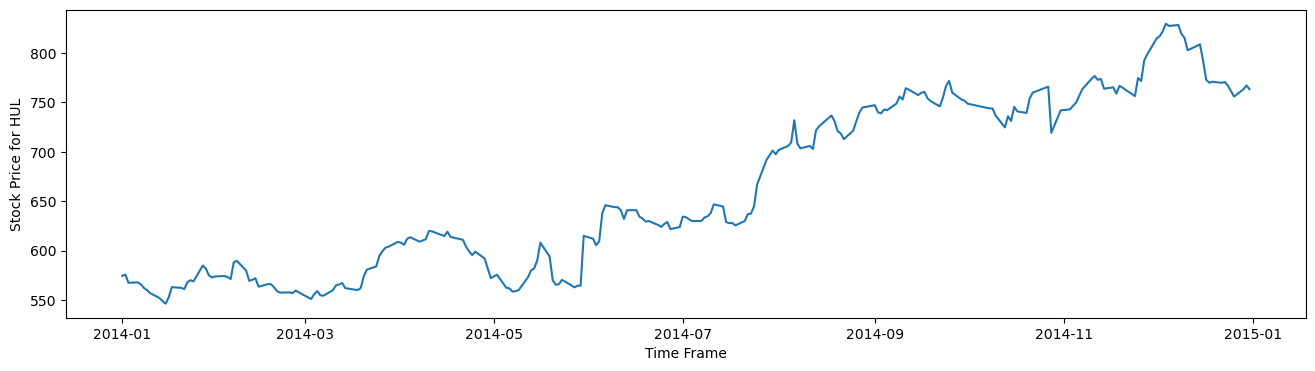

In [21]:
plt.figure(figsize=(16,4))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HUL')
ax1.plot(StockData)

# CHECKING STATIONARITY OF DATASET

Method 1 - Rolling Statistics

Method 2 - Duckey Fuller Test

Determining Rolling Statistics

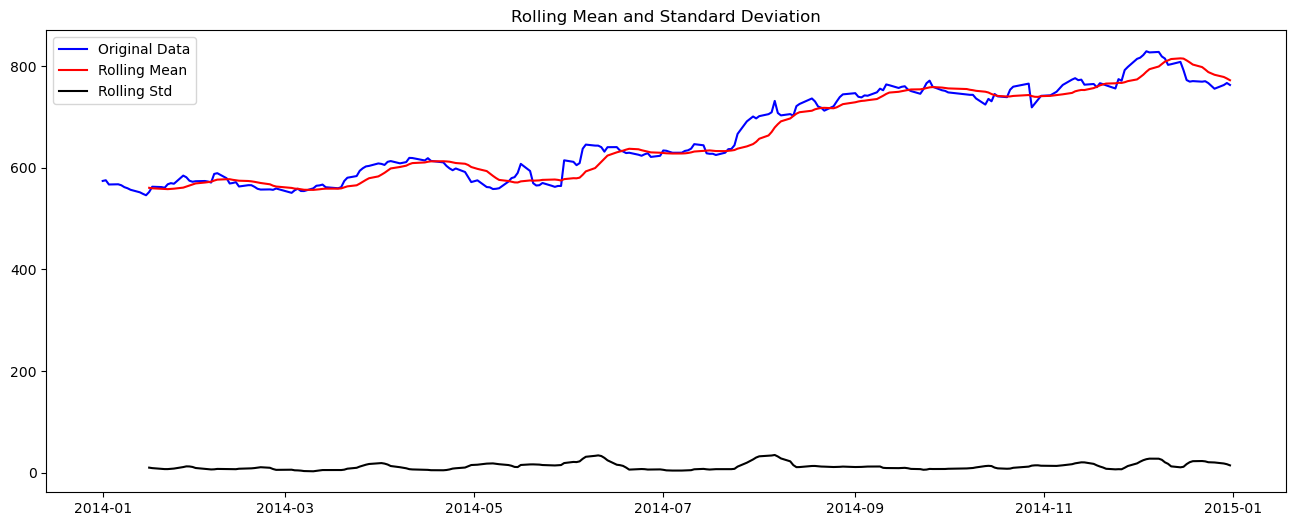

In [22]:
rollmean = StockData.rolling(12).mean()
rollstd = StockData.rolling(12).std()
plt.figure(figsize = (16,6))
fig = plt.figure(1)

#Plotiing the Rolling Statistics

orig = plt.plot(StockData,color='blue',label='Original Data')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

Rolling Stats plot shows that the Standard Deviation is constant over the time but the mean is fluctuating, i.e., not constant over time. Thus we need to make the Time Series Stationary.

# MAKING TIME SERIES STATIONARY

(244,)

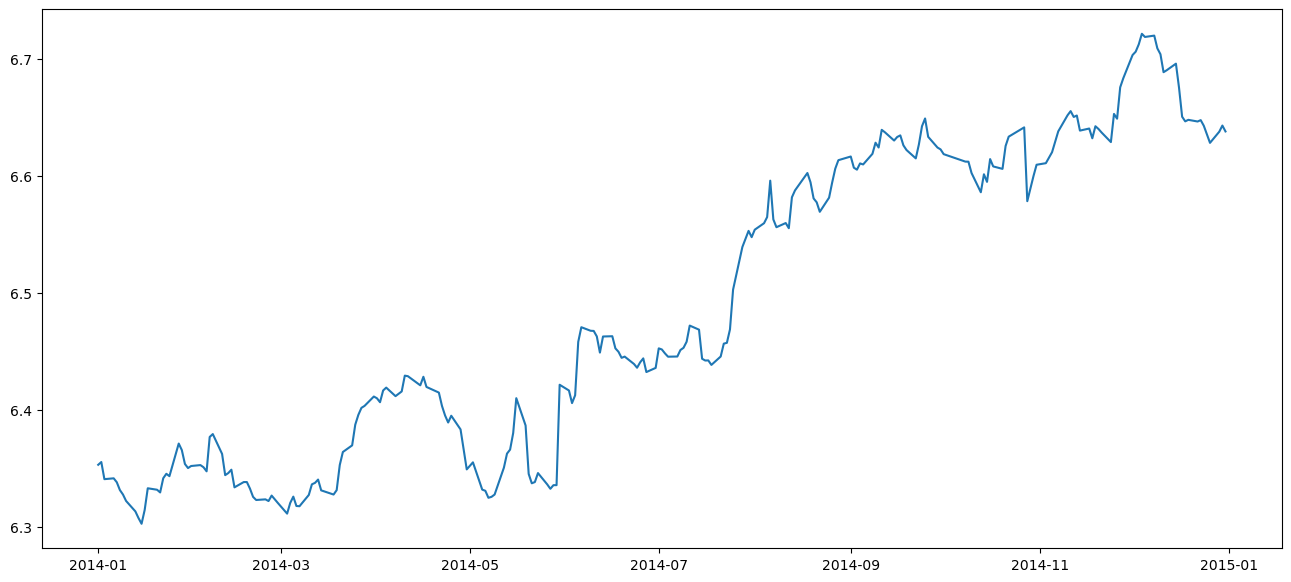

In [23]:
# lets Try Transformation

plt.figure(figsize = (16,7))
fig = plt.figure(1)
ts_log = np.log(StockData)
plt.plot(ts_log)
ts_log.shape

Deleting the rows having missing values

In [24]:
import pandas as pd
ts_log = np.log(StockData)
print(ts_log.shape)

missing_count = ts_log.isnull().sum()
print("Count of missing values in the column:", missing_count)

(244,)
Count of missing values in the column: 0


In [25]:
import pandas as pd

import pandas as pd
ts_log = np.log(StockData)

# Drop rows with missing values (NaN) from the DataFrame
ts_log.dropna(inplace=True)


print("Count of missing values in the column:", missing_count)
print(ts_log.shape)

Count of missing values in the column: 0
(244,)


Here, we are taking log transformation

Here. log transformation does not make the Time Series Stationary. To double sure about the Time Series not being Stationary, we will just decompose into seasonal components.

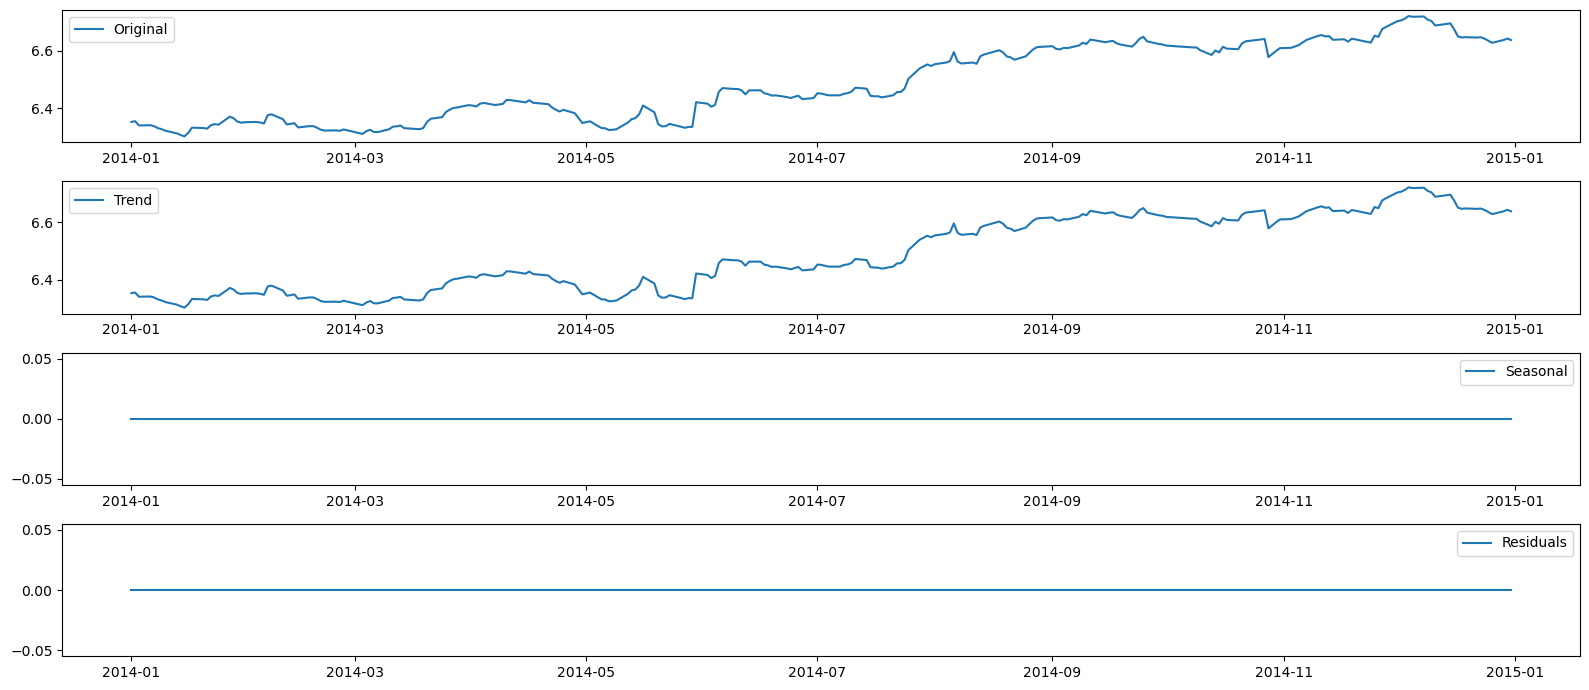

(244,)

In [26]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Perform seasonal decomposition on the original data without changing the frequency
decomposition = seasonal_decompose(ts_log, period=1, model='additive')

# Retrieve the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plotting
plt.figure(figsize=(16, 7))

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ts_log.shape

From the plots, it is clear that the Trend and Seasonal both components all contribute to the irregularity in Time Series. 

So log transformation did no good.

Thus differencing is done further, i.e., a Differenced Time Series is created. In a Differenced Time Series we shift the Time Series by 1 and substract from the original value. 

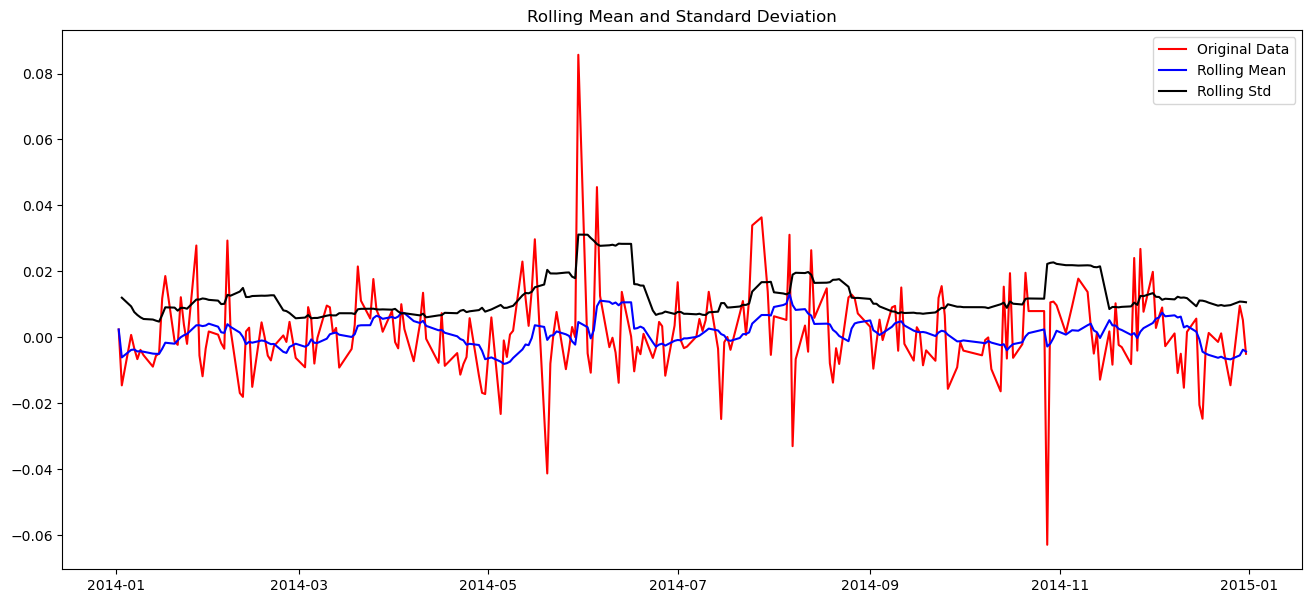

(244,)
(243,)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Perform differencing
#ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log.diff(periods=1).dropna()
# Exclude the first row containing NaN
#ts_log_diff = ts_log_diff[1:]

# Determine Rolling Statistics
rollmean = ts_log_diff.rolling(12, min_periods=1).mean()
rollstd = ts_log_diff.rolling(12, min_periods=1).std()

# Plot Rolling Statistics
plt.figure(figsize=(16, 7))
orig = plt.plot(ts_log_diff, color='red', label='Original Data')
mean = plt.plot(rollmean, color='blue', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()
print(ts_log.shape)
print(ts_log_diff.shape)

Thus, we have obtained stationarity, as there is no upward pattern in the mean or there is no upward pattern in standard deviation. So by the definition of Stationarity, if we take mean between any two specified time intervals from the plot, there should not be much difference in the mean of means or SDs.

We will Cross Validate the Stationarity of Time Series by doing a Duckey Fuller Test.

In [28]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Handle missing and infinite values
ts_log_cleaned = ts_log_diff.dropna()  # Remove missing values
ts_log_cleaned = ts_log_cleaned[np.isfinite(ts_log_cleaned)]  # Remove infinite values

# Perform Dickey-Fuller test
result = adfuller(ts_log_cleaned)

# Extract test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print test results
print('Test Statistic:', test_statistic)
print('p-value:', p_value)

# Interpret test results
if p_value < 0.05:
    print('The Time Series is Stationary.')
else:
    print('The Time Series is Non-Stationary')


Test Statistic: -13.819342004258171
p-value: 7.9587629575249e-26
The Time Series is Stationary.


# Now, Lets try ACF and PACF

ACF and PACF are important to determine what would be the order of AR and MA components in ARIMA model.

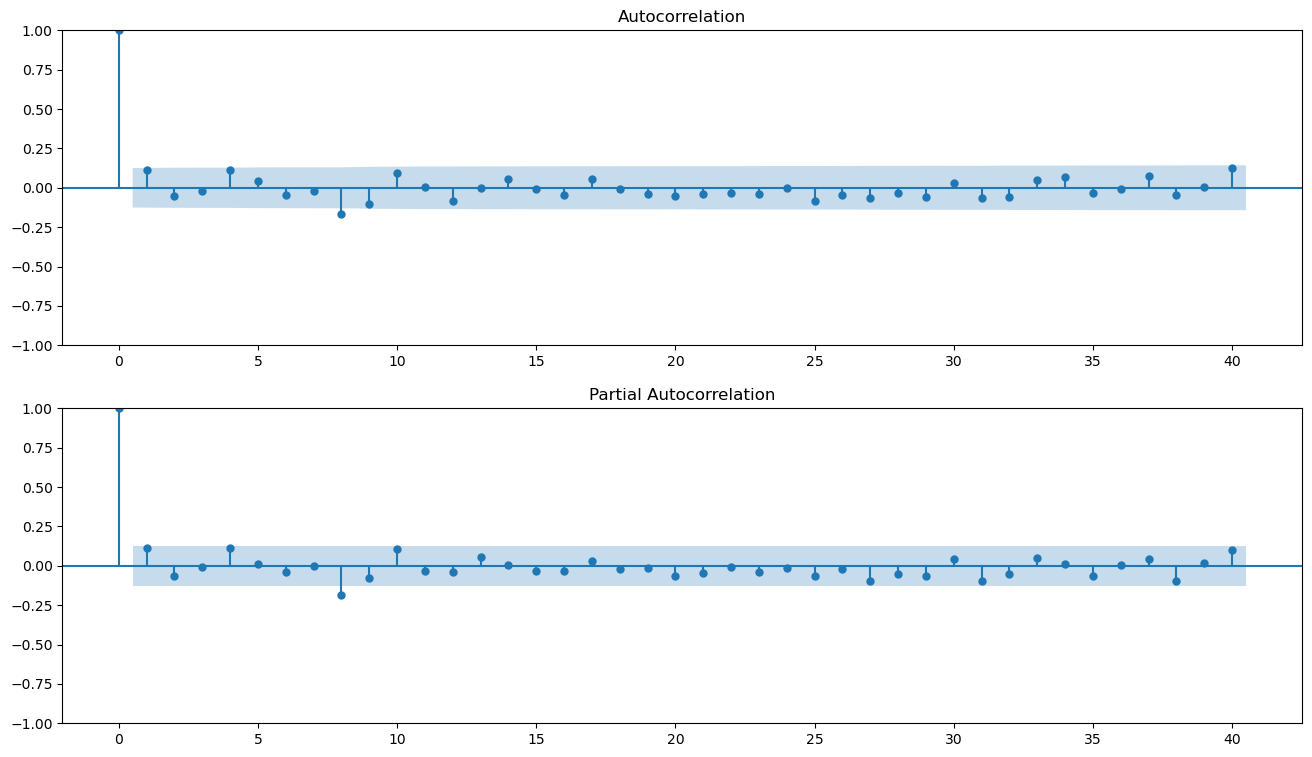

In [29]:
StockData.sort_index(inplace = True)

from statsmodels.tsa.stattools import acf,pacf
log_acf = acf(ts_log_diff,nlags = 20)
log_pacf = pacf(ts_log_diff,nlags = 20)

import statsmodels.api as sm
fig = plt.figure(figsize = (16,9))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags = 40,ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags = 40,ax = ax2)

Whenever we are running an ARIMA model, we do not know what order of AR, MA and I (p,d,q values) will be good for our model.
Thus in this scenario, ACF and PACF charts help us to understand the above stated problem.

# Rule for Noting the values of p,d,q From the ACF and PACF charts

The thumb rule is, whatever the highlighted part we see in the ACF and PACF charts are the Confidence Intervals and the first line that crosses the highlighted portion of the chart is the line of order. 

Thus, we consider order of AR as 2 since point 2 touches the highlighted portion first from the autocorrelation chart.

Similarly, order of MA is also considered as 2 from the partial autocorrelation chart, based on similar procedures.

We start with order (2,0,2) but we surely do not know whether this will be actually good for prediction or not.

D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


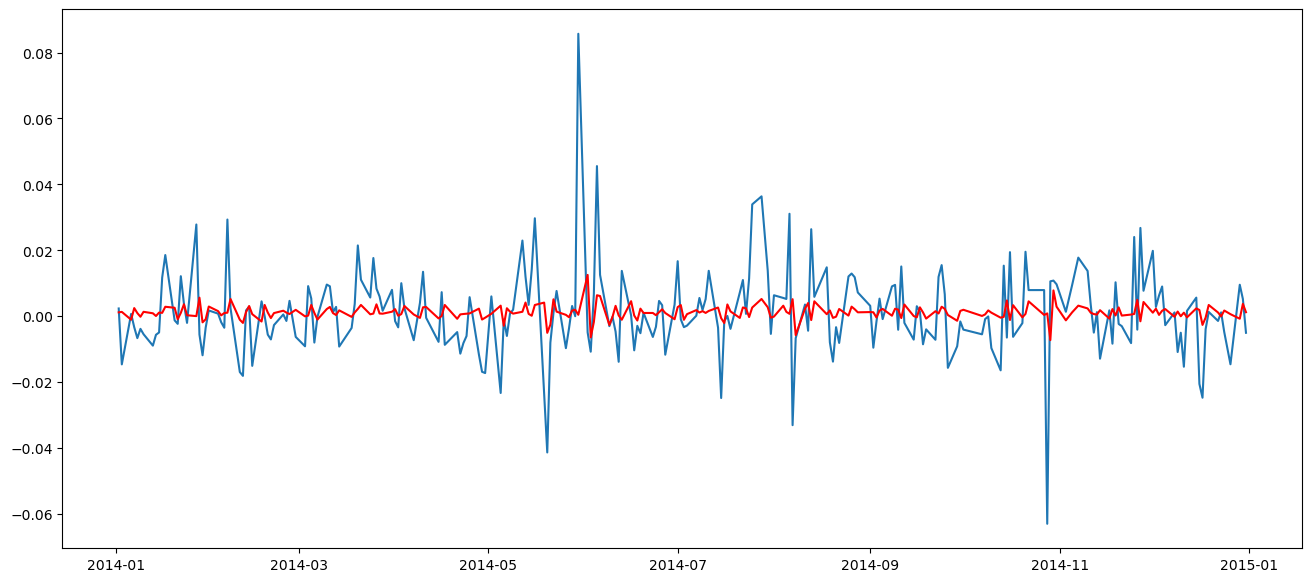

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16, 7))

model = ARIMA(ts_log_diff, order=(2, 0, 2))
results_ARIMA = model.fit()

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

Thus, we get a fitted curve which is stationary over the period. 

Now we have done many transformtaions, so, we need to take results back to the original scale.

In [31]:
# Taking results back to the original scale

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_diff_predictions.head)

<bound method NDFrame.head of Date
2014-01-02    0.001166
2014-01-03    0.001312
2014-01-06   -0.001063
2014-01-07    0.002466
2014-01-08    0.000949
                ...   
2014-12-24    0.001725
2014-12-26    0.000622
2014-12-29   -0.000765
2014-12-30    0.003747
2014-12-31    0.001212
Length: 243, dtype: float64>


Here we are printing the fitted values

In [32]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head)

<bound method NDFrame.head of Date
2014-01-02    0.001166
2014-01-03    0.002479
2014-01-06    0.001416
2014-01-07    0.003882
2014-01-08    0.004831
                ...   
2014-12-24    0.279699
2014-12-26    0.280321
2014-12-29    0.279556
2014-12-30    0.283304
2014-12-31    0.284515
Length: 243, dtype: float64>


Here, we are taking the cumulative sum, the reason being we differenced the Time Series.

In [33]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value = 0)
ARIMA_log_prediction.head

<bound method NDFrame.head of Date
2014-01-01    6.353326
2014-01-02    6.354492
2014-01-03    6.355805
2014-01-06    6.354742
2014-01-07    6.357208
                ...   
2014-12-24    6.633026
2014-12-26    6.633647
2014-12-29    6.632882
2014-12-30    6.636630
2014-12-31    6.637841
Length: 244, dtype: float64>

The addition done here is to compensate for the differencing we have done earlier. 

Date
2014-01-01    574.400024
2014-01-02    575.070347
2014-01-03    575.825524
2014-01-06    575.213699
2014-01-07    576.633965
                 ...    
2014-12-24    759.777428
2014-12-26    760.249811
2014-12-29    759.668702
2014-12-30    762.520745
2014-12-31    763.445227
Length: 244, dtype: float64


(244,)

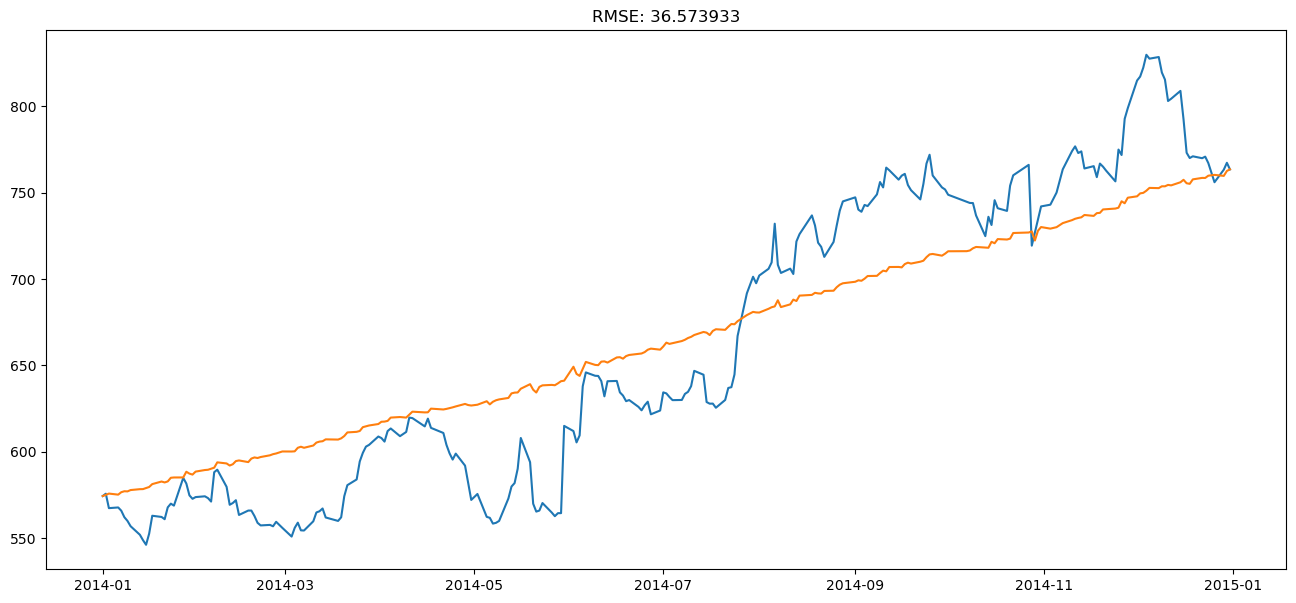

In [34]:
plt.figure(figsize = (16,7))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
print(predictions_ARIMA)
pred=np.exp(ARIMA_log_prediction)
plt.plot(StockData)
plt.plot(pred)
plt.title('RMSE: %4f' % np.sqrt(abs(sum((pred - StockData)**2))/len(StockData)))
StockData.shape

Since, we have done log transformation, thus, to scale the values back to original, we exponentiate the log values.

The predicted Time Series is capturing the trend component well but fails to capture some of the unexpected fluctuations of the data, as the volume of fluctuations does not match. So, we are getting an RMSE value.

In [35]:
results_ARIMA.predict(0,30)

Date
2014-01-02    0.001166
2014-01-03    0.001312
2014-01-06   -0.001063
2014-01-07    0.002466
2014-01-08    0.000949
2014-01-09   -0.000155
2014-01-10    0.001336
2014-01-13    0.000888
2014-01-14    0.000066
2014-01-15    0.001107
2014-01-16    0.001019
2014-01-17    0.002864
2014-01-20    0.002572
2014-01-21   -0.000916
2014-01-22    0.001020
2014-01-23    0.003618
2014-01-24    0.000288
2014-01-27    0.000033
2014-01-28    0.005622
2014-01-29   -0.001854
2014-01-30   -0.000950
2014-01-31    0.002941
2014-02-03    0.001545
2014-02-04    0.000263
2014-02-05    0.000972
2014-02-06    0.001063
2014-02-07    0.005216
2014-02-10   -0.001070
2014-02-11   -0.002033
2014-02-12    0.001249
2014-02-13    0.003084
Name: predicted_mean, dtype: float64

Some Predicted results...

In [36]:
from sklearn.metrics import r2_score
r2_score(StockData,pred)

0.8180451115232061

We might improve the accuracy by defining improved parameter values of p,d and q.

There is another way in which we can improve our results. The way is known as Auto-ARIMA.

# AUTO ARIMA

In [37]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,start_p = 3,
                            start_q = 3,
                            max_p = 10,
                            max_q = 10,
                            test = 'adf',
                            seasonal = True,
                            trace = True)
    return automodel

In [39]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1402.247, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1407.424, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1408.549, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1408.949, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1407.537, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1406.965, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1407.373, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1405.441, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1409.453, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1407.406, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1407.743, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1409.060, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1405.780, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.220 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Thus we have got our best p,d and q values, which are p = 0, d = 1, q = 0. Now we are going to put these values in the ARIMA model and recalculate the predictions.

D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


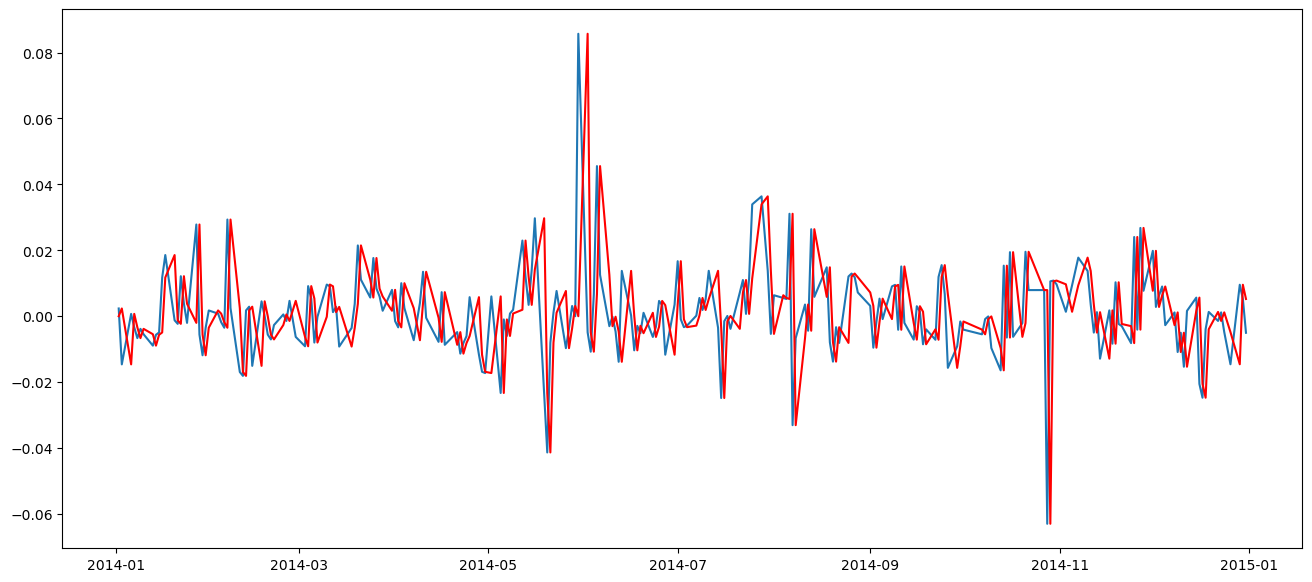

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16, 7))

model = ARIMA(ts_log_diff, order=(0, 1, 0)) #New values substituted
results_ARIMA = model.fit()

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

The curve we have got is surely overfitting. Let's see further reults...

In [41]:
# Taking results back to the original scale

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_diff_predictions.head)

<bound method NDFrame.head of Date
2014-01-02    0.000000
2014-01-03    0.002347
2014-01-06   -0.014609
2014-01-07    0.000705
2014-01-08   -0.003352
                ...   
2014-12-24    0.001168
2014-12-26   -0.004812
2014-12-29   -0.014576
2014-12-30    0.009544
2014-12-31    0.005227
Length: 243, dtype: float64>


Same calculations repeated...

In [42]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head)

<bound method NDFrame.head of Date
2014-01-02    0.000000
2014-01-03    0.002347
2014-01-06   -0.012261
2014-01-07   -0.011557
2014-01-08   -0.014909
                ...   
2014-12-24    0.294103
2014-12-26    0.289291
2014-12-29    0.274715
2014-12-30    0.284260
2014-12-31    0.289487
Length: 243, dtype: float64>


In [43]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value = 0)
ARIMA_log_prediction.head

<bound method NDFrame.head of Date
2014-01-01    6.353326
2014-01-02    6.353326
2014-01-03    6.355674
2014-01-06    6.341065
2014-01-07    6.341769
                ...   
2014-12-24    6.647429
2014-12-26    6.642617
2014-12-29    6.628041
2014-12-30    6.637586
2014-12-31    6.642813
Length: 244, dtype: float64>

Date
2014-01-01    574.400024
2014-01-02    574.400024
2014-01-03    575.750000
2014-01-06    567.400024
2014-01-07    567.799985
                 ...    
2014-12-24    770.799984
2014-12-26    767.099972
2014-12-29    755.999996
2014-12-30    763.249996
2014-12-31    767.249996
Length: 244, dtype: float64


(244,)

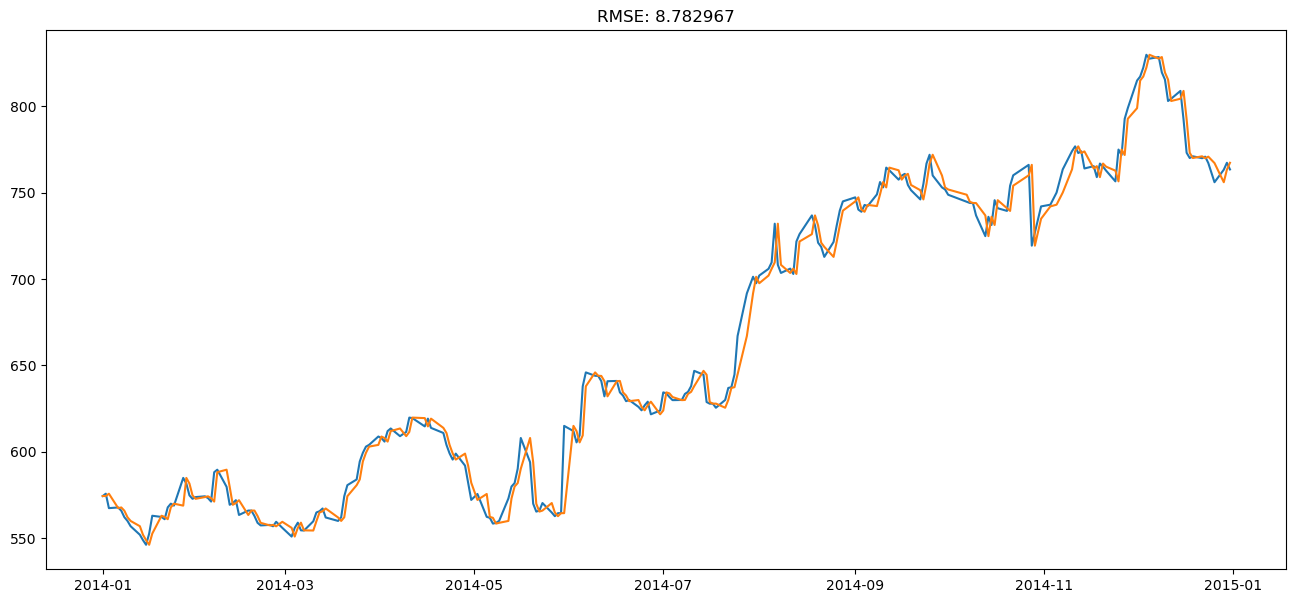

In [44]:
plt.figure(figsize = (16,7))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
print(predictions_ARIMA)
pred=np.exp(ARIMA_log_prediction)
plt.plot(StockData)
plt.plot(pred)
plt.title('RMSE: %4f' % np.sqrt(abs(sum((pred - StockData)**2))/len(StockData)))
StockData.shape

Thus, our Time Series model is perfetctly capturing the trend as well as the unexpected fluctuations also.

Hence, Auto-ARIMA has helped us to find the best model.

In [45]:
results_ARIMA.predict(0,30)

Date
2014-01-02    0.000000
2014-01-03    0.002347
2014-01-06   -0.014609
2014-01-07    0.000705
2014-01-08   -0.003352
2014-01-09   -0.006649
2014-01-10   -0.003832
2014-01-13   -0.005461
2014-01-14   -0.008927
2014-01-15   -0.005632
2014-01-16   -0.004931
2014-01-17    0.011740
2014-01-20    0.018555
2014-01-21   -0.001244
2014-01-22   -0.002315
2014-01-23    0.012136
2014-01-24    0.003779
2014-01-27   -0.002020
2014-01-28    0.027824
2014-01-29   -0.005572
2014-01-30   -0.011847
2014-01-31   -0.003486
2014-02-03    0.001744
2014-02-04    0.000784
2014-02-05   -0.001830
2014-02-06   -0.003495
2014-02-07    0.029328
2014-02-10    0.002462
2014-02-11   -0.016932
2014-02-12   -0.018102
2014-02-13    0.001755
Name: predicted_mean, dtype: float64

In [46]:
from sklearn.metrics import r2_score
r2_score(StockData,pred)

0.9895069224174592

Our Time Series Model explains nearly 98.95% variation in the data.